# Unit 02: Computing with Data in Python

# Outline of Unit 02

- **02: Computing with Data in Python**
  - Vector
      - Vectors: assigning, accessing, visualizing
      - Vector addition, subtraction, scaling, linear combination
      - Inner products, affine function, norm, distance, angle
      - Orthogonality and linear independence
  - Matrix
      - Matrices, special matrices
      - Matrix transpose, addition, subtraction, scaling
      - Matrix-vector multiplication, Matrix-matrix multiplication
      - Column space, row space, kernel, co-kernel, rank
      - Solving systems of linear equations
      - Singular Value Decomposition

## Recap last week's discussion on vectors

**Vectors**
- Definition of a vector
- Special vectors (Zero, Ones, One-hot)
- Operations on vectors
    - Addition/Subtraction
    - Scalar-Vector multiplication
    - Elementwise Vetor multiplication
    - Inner product
    - Norm and Distance
    - Angle

**Collection of Vectors**
- Linear combinations (average, sum, affine, convex), Linear Span
- Linear dependence and Linear Independence, Basis
- Orthonormal set (normalized and orthogonal), Orthonormal Basis

### Linear combinations

$\color{#EF5645}{\text{Definition}}$: For a collection of $m$ n-vectors $a_1, . . . , a_m$ and scalars $β_1, . . . , β_m$, the vector defined as

$$β_1a_1 + · · · + β_ma_m$$

is a *linear combination* of the vectors.

### Span

$\color{#EF5645}{\text{Definition}}$: The span of $m$ n-vectors $a_1, . . . , a_m$ is the set of all possible linear combinations of the $m$ vectors,

$$\text{span}(a_1, . . . , a_m) = \left\{\beta_1 a_1 + \dots + \beta_m a_m | \forall \beta_i \in \mathbb{R}\right\}$$

### Linear Dependence

$\color{#EF5645}{\text{Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily dependent* if there exists a vector $a_i$ which can be expressed as a linear combination of the other vectors.

### Linear Independence

$\color{#EF5645}{\text{Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily independent* if no vector $a_i$ can be expressed as a linear combination of the other vectors.

### Basis

$\color{#EF5645}{\text{Definition}}$: A collection of $n$ n-vectors $a_1, . . . , a_n$ is a basis if the collection is linearily independent.

### Orthonormal Set

$\color{#EF5645}{\text{Definitions}}$: A set of k $n$-vectors $a_1, . . . , a_k$ form an *orthonormal set* if they are
- _(mutually) orthogonal_ if $a_i ⊥ a_j$ for all $i , j$
- _normalized_ if $‖a_i ‖ = 1$ for $i = 1, . . . , k$

$\color{#6D7D33}{\text{Properties}}$: If $a_1, ..., a_k$ form an orthonormal set, then:
- $k\leq n$,
- $a_1, ..., a_k$ are linearly independent.

### Orthonormal Basis

$\color{#EF5645}{\text{Definition}}$: A set of $n$ orthonormal $n$-vectors is called an _orthonormal basis_ of $\mathbb{R}^n$.

**Problem 1:** Which of the following statements is false?

- The span of the $0$ vector is always a point.
- The span of $k$ orthonormal vectors (i.e. an orthonormal set) is $k$ dimensional.
- If the span of $k$ n-vectors is less than $k$ dimensional, then the set is linearily dependent.
- A set of $k < n$ linearily independent n-vectors forms a basis.

**Problem 2:** Which of the following pairs of vectors span all of $\mathbb{R}^2$?

- $a = [0, 1], b = [0,-4]$
- $a = [1,-3]$ and $b = [-1.5, 4.5]$
- $a = [1,1]$ and $b = [0, 0]$
- $a = [1,2]$ and $b = [2,1]$

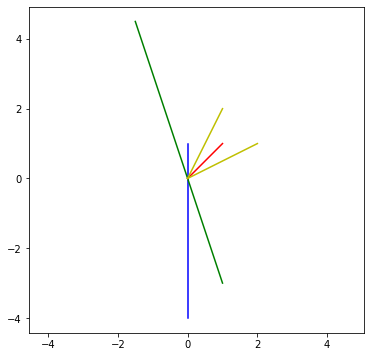

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a1 = np.array([0, 1]); b1 = np.array([0, -4]);
a2 = np.array([1, -3]); b2 = np.array([-1.5, 4.5]);
a3 = np.array([1, 1]); b3 = np.array([0, 0]);
a4 = np.array([1, 2]); b4 = np.array([2, 1]);

def plotvector(a, c):
    plt.plot([0, a[0]],[0, a[1]], c=c)

fig = plt.figure(figsize=(6, 6))
plotvector(a1, c='b'); plotvector(b1, c='b');
plotvector(a2, c='g'); plotvector(b2, c='g');
plotvector(a3, c='r'); plotvector(b3, c='r');
plotvector(a4, c='y'); plotvector(b4, c='y');
plt.axis("equal")
plt.show()

**Problem 3:** Are the vectors $a_1 = [1,0,0]$, $a_2 = [0,0,-1]$, $a_3=[0,1,0]$ linearily dependent or linearily independent? Do they form a basis? Do they form an orthonormal basis?

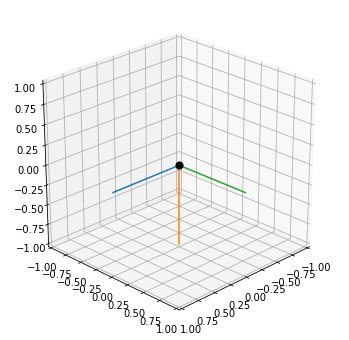

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a1 = np.array([1, 0, 0])
a2 = np.array([0, 0, -1])
a3 = np.array([0, 1, 0])

def plot3Dvectors(A, elev=25, angle=45):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(0, 0, 0, c='k', s=50)
    for a in A:
        ax.plot(np.array([0, a[0]]), [0, a[1]], [0, a[2]])
    ax.set_xlim((-np.max(A), np.max(A)))
    ax.set_ylim((-np.max(A), np.max(A)))
    ax.set_zlim((-np.max(A), np.max(A)))
    ax.view_init(elev=elev, azim=angle)
    plt.show()

plot3Dvectors([a1, a2, a3])

**Problem 4:** Are the vectors $a_1 = [1,0,0]$, $a_2 = [0,0,-1]$, $a_3=[-1,1,0]$ linearily dependent or linearily independent? Do they form a basis? Do they form an orthonormal basis?

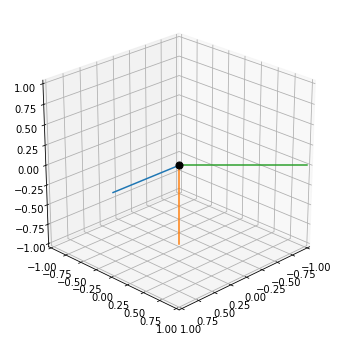

In [63]:
a1 = np.array([1, 0, 0])
a2 = np.array([0, 0, -1])
a3 = np.array([-1, 1, 0])

plot3Dvectors([a1, a2, a3], elev=25, angle=45)

**Problem 5:** Are the vectors $a_1 = [0.2,-7.0,8.6]$, $a_2 = [-0.1,2.0,-1.0]$, $a_3=[0,-1.0,2.2]$ linearily dependent or linearily independent? Do they form a basis? Do they form an orthonormal basis?

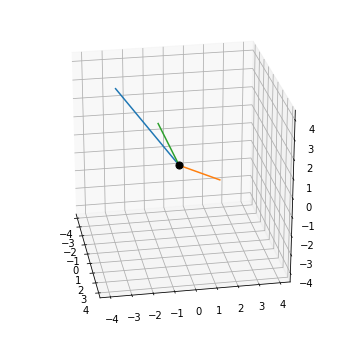

In [120]:
a1 = np.array([0.1, -3.0, 4.3])
a2 = np.array([-0.1, 2.0, -1.0])
a3 = np.array([0, -1.0, 2.3])

plot3Dvectors([a1, a2, a3], elev=25, angle=-10)

**Problem 6:** Are the vectors $a_1 = [0,0,-1]$, $a_2 = [1/\sqrt{2}, 1/\sqrt{2}, 0]$, $a_3=[1/\sqrt{2}, -1/\sqrt{2}, 0]$ linearily dependent or linearily independent? Do they form a basis? Do they form an orthonormal basis?

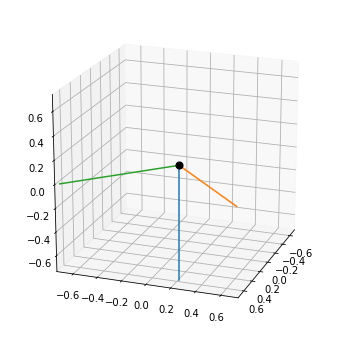

In [72]:
a1 = np.array([0, 0, -1])
a2 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
a3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

plot3Dvectors([a1, a2, a3], elev=20, angle=20)

**Problem 7:** Suppose $a_1,\dots,a_k$ are orthonormal n-vectors and $x = \beta_1 a_1 + \dots + \beta_k a_k$ is a linear combination determined by the scalars $\beta_1,\dots,\beta_k$.  What is the norm $\|x\|$?

In [122]:
# First Example Orthonormal set
a1 = np.array([0, 0, -1])
a2 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
a3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])
b = np.array([-1, 3, 6])
x = b[0] * a1 + b[1] * a2 + b[2] * a3
print(np.linalg.norm(b))

print(np.linalg.norm(b))


# # Second Example Orthonormal set
# a1 = np.array([1,0,0,0])
# a2 = np.array([0,1,0,0])
# a3 = np.array([0,0,1,0])
# b = np.array([-1, 3, 6])
# x = b[0] * a1 + b[1] * a2 + b[2] * a3
# print(np.linalg.norm(b))

6.782329983125268
6.782329983125268


**Problem 8:** Suppose $a$ and $b$ are any non-zero n-vectors. What is the value of $\gamma$ such that $(a - \gamma b) \perp b$?
- $\gamma = a^\intercal b$
- $\gamma = \|b\|$
- $\gamma = a^\intercal b / \|b\|$
- $\gamma = a^\intercal b / \|b\|^2$

In [16]:
a = np.array([3, -2, -1, 2, 0])
b = np.array([-1, 3, 6, 1, -3])

gamma1 = np.dot(a, b)
gamma2 = np.linalg.norm(b)
gamma3 = np.dot(a, b) / np.linalg.norm(b)
gamma4 = np.dot(a, b) / np.linalg.norm(b)**2

c = a - gamma1 * b

print(np.dot(c, b))

# 1. What is a Matrix

<center><img src="figs/06_matrix_everywhere.gif" alt="default", width=1000px/></center>

## Definition of a Matrix

$\color{#EF5645}{\text{Definition}}$: A _matrix_ is a rectangular array of numbers, e.g.:
$$A =\begin{vmatrix}
0   & 1  & -2.3  \\
1.3 & 4  & -0.1 
\end{vmatrix}$$

- Its _size_ or _shape_ is: (number of rows) x (number of columns).
- Its elements are called: _entries, coefficients_.
- $A_{i, j}$ refers to element at ith row and jth column.
  - i is the _row index_ and j is the _column index_.
  
$\color{#EF5645}{\text{Remark:}}$ We often denote a matrix with a capital letter such as A and vectors with a lower case letter such as a.

### Examples in ECE and beyond


- Weather: $A_{ij}$ is rainfall data at location $i$ on day $j$.
- Finances: $A_{ij}$ is the return of asset $i$ in period $j$.
- Images: $A_{ij}$ is intensity value at $i, j$.

$\color{#003660}{\text{In Python}}$, we use `numpy` and `np.array` to build matrices. We compute its shape with `shape`.

In [128]:
import numpy as np


A = np.array([
    [0, 1, -2.3], 
    [1.3, 4, -0.1]
])
print(A)
print(np.shape(A))
print(A.size)

[[ 0.   1.  -2.3]
 [ 1.3  4.  -0.1]]
(2, 3)
6


$\color{#003660}{\text{In Python}}$, we can access the elements of the matrix.

In [129]:
A = np.array([
    [0, 1, -2.3], 
    [1.3, 4, -0.1]
])

print(A[0, 0])
print(A[0, 2])

0.0
-2.3


## Sizes/Shapes of Matrices

$\color{#EF5645}{\text{Definitions}}$: A $n \times m$ matrix $A$ is:
- _tall_ if n > m (more rows than columns)
- _wide_ if n < m (more columns than rows)
- _square_ if n = m (same columns as rows)

$\color{#EF5645}{\text{Special cases}}$:
- A 1 x 1 matrix is a number or scalar.
- A n x 1 matrix is an $n$-vector.
- A 1 x m matrix is a $m$-row-vector. 

Starting now, we will distinguish vectors and row vectors.

## Column representation of a matrix

An $n \times m$ matrix $A$ can be repersented an ordered collection of m n-vectors $a_1, ..., a_n$:
  $$A = [a_1 ... a_n]$$
The jth column of $A$ is the $n$-vector:
$$a_j = \begin{vmatrix}
A_{1j} \\
\vdots \\
A_{nj}
\end{vmatrix}$$

## Row representation of a matrix
An $n \times m$ matrix $A$ can be repersented an ordered collection of n m-row-vectors $b_1, ..., b_n$:
  $$A = \begin{vmatrix}
  b_1 \\
  \vdots \\
  b_m
  \end{vmatrix}$$
The ith row is the $m$-row-vector: 
$$[A_{i1}, ..., A_{im}]$$

## Slices of a matrix

$\color{#EF5645}{\text{Definition}}$ The slice of matrix $A_{p:q, r:s}$ is the matrix:
$$\begin{vmatrix}
A_{pr} & A_{p, r+1} & ... & A_{ps}  \\
... & ... & ... & ... \\
A_{qr} & A_{q, r+1} & ... & A_{qs}
\end{vmatrix}.$$

$\color{#003660}{\text{In Python}}$, we can extract rows, columns and slices:

In [130]:
A = np.array([
    [1.1, 2.2, 3.3], 
    [4.4, 5.5, 6.6], 
    [7.7, 8.8, 9.9]]) 
print("Matrix:")
print(A)

print("Columns:")
print(A[:,0]); print(A[:,1]); print(A[:,2])

print("Rows:")
print(A[0, :]); print(A[1,:]); print(A[2,:])

print("Matrix Slice:")
A[0:2, 1:3]

Matrix:
[[1.1 2.2 3.3]
 [4.4 5.5 6.6]
 [7.7 8.8 9.9]]
Columns:
[1.1 4.4 7.7]
[2.2 5.5 8.8]
[3.3 6.6 9.9]
Rows:
[1.1 2.2 3.3]
[4.4 5.5 6.6]
[7.7 8.8 9.9]
Matrix Slice:


array([[2.2, 3.3],
       [5.5, 6.6]])

## Special Matrices

### Zero Matrix

$\color{#EF5645}{\text{Definition}}$: The $n \times m$ matrix with all entries 0 is denoted $0_{n \times m}$ or just $0$ and is called a _zero matrix_. 

### Ones Matrix

$\color{#EF5645}{\text{Definition}}$: $n \times m$ matrix with all entries 1 is denoted $1_{n \times m}$ or just $1$ and is called a _ones matrix_.

### Identity Matrix

$\color{#EF5645}{\text{Definition}}$: The $n \times n$ matrix with all entries 0 except the diagonal elements are 1 is denoted $I_n$ or just $I$ is the _identity matrix_.

$\color{#003660}{\text{In Python}}$, we use `zeros` , `ones`, and `identity` or `eye` (from `numpy`) to build these vectors.

In [133]:
n, m = 3, 4

zero = np.zeros((n,m))
print(zero)

ones = np.ones((n,m))
print(ones)

I = np.eye(n)
I = np.identity(n)
print(I)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


$\color{#047C91}{\text{Exercise}}$: How many elements of an $n$ identity matrix are zero?

In [135]:
n = 1200
I = np.eye(n)
num_zero = np.sum(I == 0)

print(num_zero)
print(n * (n - 1))

1438800
1438800


# Operations on Matrices

## Operations that directly follow from vector operations

### Matrix Addition and Subtraction

$\color{#EF5645}{\text{Definition}}$: Two $n \times m$ matrices A and B can be added or subtracted to give a new $n \times m$ matrix:
$$(A + B)_{ij} = A_{ij} + B_{ij}.$$

### Scalar-Matrix multiplication

$\color{#EF5645}{\text{Definition}}$: A scalar β and an $n \times m$ matrix a can be multiplied to give a new $n \times m$ matrix: 
$$(βA)_{ij} = \beta A_{ij}.$$

### Elementwise-multiplication (Hadamard Product)

$\color{#EF5645}{\text{Definition}}$: Two $n \times m$ matrices $A$ amd $B$ can be multiplied to give a new $n \times m$ matrix: 
$$(A \odot B)_{ij} = A_{ij}B_{ij}.$$

## Frobenius Norm

$\color{#EF5645}{\text{Definition}}$: For a $n \times m$ matrix $A$, we define the _matrix norm_ as:

<center>
$||A|| = \sqrt{\sum_{i=1}^n \sum_{j=1}^m A_{ij}^2}.$</center>

$\color{#EF5645}{\text{Remark}}$: This definition agrees with the definition of norm of vectors when $n=1$ or $m=1$.

$\color{#047C91}{\text{Exercise}}$: Compute the matrix norm of $A = \begin{vmatrix}
1 & 0 & -1\\
0 & 1 & 1 \end{vmatrix}.$

$\color{#003660}{\text{In Python}}$, we use `np.linalg.norm`.

In [27]:
import numpy as np

A = np.array([
    [1, 0, -1],
    [0, 1, 1]
])
print(np.linalg.norm(A))

2.0


$\color{#047C91}{\text{Exercise}}$: Can you write a function that determines the Frobenius norm of a matrix $A$ in terms of the Eulciden norm of its column vectors $a_1, \dots, a_m$?

In [136]:
def frobenius_norm(A):
    n, m = np.shape(A)
    norm = 0
    for j in range(m):
        a = A[:,j]
        norm += np.dot(a,a)
    return np.sqrt(norm)


A = np.array([
    [1, 0, -1],
    [0, 1, 1]
])
print(frobenius_norm(A))

2.0


## Transpose

$\color{#EF5645}{\text{Definition}}$: The _transpose of an $n \times m$ matrix_ $A$ is a $m \times n$ matrix, written $A^T$, and is defined by:
$$ (A^T)_{ij} = A_{ji}, \quad i = 1,...,m \quad j=1,...,n$$

$\color{#047C91}{\text{Example}}$: $\begin{vmatrix}
0.2 & 1.2 & 10 \\
0 & -3 & 0
\end{vmatrix}^T = \begin{vmatrix}
0.2 & 0 \\
1.2 & -3 \\
10 & 0
\end{vmatrix}$


$\color{#6D7D33}{\text{Property}}$: The transpose verifies:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$

_Hint:_ $\color{#003660}{\text{In Python}}$, we use `imshow` to plot an image.

[[ 1  0 -1]
 [ 0  1  0]]
[[ 1  0]
 [ 0  1]
 [-1  0]]


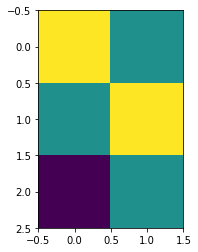

In [140]:
A = np.array([
    [1, 0, -1],
    [0, 1, 0]])

print(A)
print(A.T)
plt.imshow(A)
plt.imshow(A.T)

## Trace

$\color{#EF5645}{\text{Definition}}$: The _trace of an $n \times m$ matrix_ $A$ is a scalar, written $\mathrm{tr}(A)$, and is defined as:
$$ \mathrm{tr}(A) = \sum_{i = 1}^{\min{n,m}}A_{ii}$$

$\color{#047C91}{\text{Example}}$: $\mathrm{Tr}\left(\begin{vmatrix}
0.2 & 1.2 & 10 \\
0 & -3 & 0
\end{vmatrix}\right) = 0.2 + -3  = -2.8$


$\color{#6D7D33}{\text{Property}}$: The trace verifies:
- $\mathrm{tr}(A) = \mathrm{tr}(A^T)$

In [99]:
A = np.array([
    [1, 0, -1],
    [0, 1, 0],
    [0, 2, -3]
])

print(np.trace(A))

-1


$\color{#047C91}{\text{Exercise}}$: What is the trace of the $n \times n$ identity matrix?

In [101]:
n = 100
print(np.trace(np.eye(n)))

100.0


## Matrix-Vector Multiplication

$\color{#EF5645}{\text{Definition}}$: If $A$ is an $n \times m$ matrix and $x$ is an $m$-vector, then the _matrix-vector_ product $y = Ax$ is the $n$-vector with elements: 
$$y_i = \sum_{j = 1}^m A_{ij}x_j$$

$\color{#047C91}{\text{Example}}$: 

$$\begin{vmatrix}
0 & 2 & -1 \\
-2 & 1 & 1
\end{vmatrix} 
\begin{vmatrix}
2 \\
1 \\
-1
\end{vmatrix} = 
\begin{vmatrix}
3 \\
-4
\end{vmatrix}$$

In [143]:
A = np.array([
    [0, 2, -1],
    [-2, 1, 1]])
x = np.array([2, 1, -1])

y = A @ x
y = A.dot(x)

print(y)

[ 3 -4]


$\color{#047C91}{\text{Exercise}}$: Can you write a function that computes the matrix-vector product only using dot products?

In [144]:
def matrix_vector_dot(A, x):
    n, m = np.shape(A)
#     if m != np.size(x):
#         return False
    y = np.zeros(n)
    for i in range(n):
        a = A[i,:]
        y[i] = np.dot(a, x)
    return y

A = np.array([
    [0, 2, -1],
    [-2, 1, 1]])
x = np.array([2, 1, -1])
y = matrix_vector_dot(A, x)
print(y)

[ 3. -4.]


$\color{#047C91}{\text{Exercise}}$: Can you write a function that computes the matrix-vector product only using linear combinations?

In [145]:
def matrix_vector_linear_comb(A, x):
    n, m = np.shape(A)
    y = np.zeros(n)
    for j in range(m):
        a = A[:,j]
        y += x[j] * a
    return y

A = np.array([
    [0, 2, -1],
    [-2, 1, 1]])
x = np.array([2, 1, -1])
y = matrix_vector_linear_comb(A, x)
print(y)

[ 3. -4.]


$\color{#047C91}{\text{Exercise}}$: If $a$ and $b$ are $n$-vectors, what is the matrix vector product $a^Tb$?

In [3]:
a = np.array([[2, 1, -1, 4, 5, -9]]).T
b = np.array([[-1, 1, 4, 4, -1, 8]]).T
y = a.T @ b
print(y)

[[-66]]


## Matrix-Matrix Multiplication

$\color{#EF5645}{\text{Definition}}$: An $n \times m$ matrix $A$ and a $m \times k$ matrix $B$ be multiplied to give a new $n \times k$ matrix C: 
$$C = AB$$

where the jth column vector of $C$ is given by the matrix vector product $Ab_j$ where $b_j$ is the jth column vector of $B$.

### Outer-Product

$\color{#EF5645}{\text{Definition}}$: An $n$-vectors $a$ amd a $m$-vector $b$ can be multiplied to give a new $n \times m$ matrix called the _outer product_: 
$$(a b^T)_{ij} = a_ib_j$$

$\color{#047C91}{\text{Exercise}}$: If $a$ and $b$ are $n$-vectors, what is the matrix matrix product $ab^T$? 

In [6]:
a = np.array([[2, 1, -1, 4, 5, -9]]).T
b = np.array([[-1, 1, 4, 4, -1, 8]]).T
y = a @ b.T
print(y)

[[ -2   2   8   8  -2  16]
 [ -1   1   4   4  -1   8]
 [  1  -1  -4  -4   1  -8]
 [ -4   4  16  16  -4  32]
 [ -5   5  20  20  -5  40]
 [  9  -9 -36 -36   9 -72]]


## Recap

**Matrices**
- Definition of a Matrix
- Special matrices (Zero, Ones, Identity)
- Operations on matrices
    - Addition/Subtraction
    - Scalar-Matrix multiplication
    - Elementwise Matrix multiplication
    - Frobenius Norm
    - Transpose
    - Trace
    - Matrix-Vector multiplication
    - Matrix-Matrix multiplication

# Unit 02: Computing with Data in Python

## Recap

**Matrices**
- Definition of a Matrix
- Special matrices (Zero, Ones, Identity)
- Operations on matrices
    - Addition/Subtraction
    - Scalar-Matrix multiplication
    - Elementwise Matrix multiplication
    - Frobenius Norm
    - Transpose
    - Trace
    - Matrix-Vector multiplication
    - Matrix-Matrix multiplication

## Matrix-Vector Multiplication

$\color{#EF5645}{\text{Definition}}$: If $A$ is an $n \times m$ matrix and $x$ is an $m$-vector, then the _matrix-vector_ product $y = Ax$ is the $n$-vector with elements: 
$$y_i = \sum_{j = 1}^m A_{ij}x_j$$

$\color{#EF5645}{\text{Remark}}$: $y$ can be understood as the linear combination of the columns of $A$ with the coefficients as the elements of $x$.

**Problem 1:** What is stored in the variable `b` in the following python code?

In [1]:
import numpy as np
x = np.array([1, -3, 9])
A = np.ones((3, 3))
b = A @ x

- `b = [0, 0, 0]`
- `b = [1, -3, 9]`
- `b = [7, 6, 9]`
- `b = [7, 7, 7]`
- `ValueError: mismatch in dimension`

**Problem 2:** What is stored in the variable `b` in the following python code?

In [26]:
import numpy as np
x = np.array([1, -3, 9])
A = np.zeros((3, 3))
b = A @ x

- `b = [0, 0, 0]`
- `b = [1, -3, 9]`
- `b = [7, 6, 9]`
- `b = [7, 7, 7]`
- `ValueError: mismatch in dimension`

**Problem 3:** What is stored in the variable `b` in the following python code?

In [27]:
import numpy as np
x = np.array([1, -3, 9])
A = np.eye(3)
b = A @ x

array([ 1., -3.,  9.])

- `b = [0, 0, 0]`
- `b = [1, -3, 9]`
- `b = [7, 6, 9]`
- `b = [7, 7, 7]`
- `ValueError: mismatch in dimension`

**Problem 4:** What is stored in the variable `b` in the following python code?

In [29]:
import numpy as np
x = np.array([1, -3, 9])
A = np.array([
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1]
])
b = A @ x

- `b = [0, 0, 0]`
- `b = [1, -3, 9]`
- `b = [7, 6, 9]`
- `b = [7, 7, 7]`
- `ValueError: mismatch in dimension`

**Problem 5:** What is stored in the variable `b` in the following python code?

In [31]:
import numpy as np
x = np.array([1, -3, 9])
A = np.array([
    [-6, 1, 1],
    [0, 3, 1],
    [3, 1, 0]
])
b = A @ x

- `b = [0, 0, 0]`
- `b = [1, -3, 9]`
- `b = [7, 6, 9]`
- `b = [7, 7, 7]`
- `ValueError: mismatch in dimension`

## Interpreting our previous definitions for collections of vectors via Matrix-Vector Multiplication

Let's redefine our definitiions for collections of vectors $a_1, \dots, a_m$ in terms of definitions of matrices $A$!

### Column Space

$\color{#EF5645}{\text{Definition}}$: The _column space_ of a $n \times m$ matrix $A$ is the space of all n-vectors $b$ which can be expressed as $Ax = b$ for some m-vector $x$.


$\color{#EF5645}{\text{Remark}}$: Every vector $b$ in the column space of $A$ is in the span of the columns of $A$:

$$b \in \text{span}(a_1, . . . , a_m)$$

### An Alternative Definition of Span

$\color{#EF5645}{\text{Definition}}$: The span of $m$ n-vectors $a_1, . . . , a_m$ is the set of all possible linear combinations of the $m$ vectors,

$$\text{span}(a_1, . . . , a_m) = \left\{\beta_1 a_1 + \dots + \beta_m a_m | \forall \beta_i \in \mathbb{R}\right\}$$

$\color{#EF5645}{\text{Alt. Definition}}$: The span of $m$ n-vectors $a_1, . . . , a_m$ is the column space of the $n \times m$ matrix $A$ with columns $a_1, . . . , a_m$ 

### Rank


$\color{#EF5645}{\text{Definition}}$: The _matrix rank_ $\mathrm{rank}(A)$ for a $n \times m$ matrix $A$ is the dimention of its column space.

$\color{#003660}{\text{In Python}}$, we use `np.linalg.matrix_rank` to determine the rank. 

In [39]:
A = np.array([
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1]
])
print(np.linalg.matrix_rank(A))

A = np.array([
    [-6, 1, 1],
    [0, 3, 1],
    [3, 1, 0]
])
print(np.linalg.matrix_rank(A))

3
2


$\color{#047C91}{\text{Exercise}}$: What is the matrix rank of $I_n$ the identity matrix in dimension $n$? How about $0_{n \times m}$? How about $1_{n \times m}$?

In [15]:
n, m = 10, 100
print(np.linalg.matrix_rank(np.eye(n)))
print(np.linalg.matrix_rank(np.zeros((n,m))))
print(np.linalg.matrix_rank(np.ones((n,m))))

10
0
1


### An Alternative Definition of Linear Dependence

$\color{#EF5645}{\text{Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily dependent* if there exists a vector $a_i$ which can be expressed as a linear combination of the other vectors.

$\color{#EF5645}{\text{Alt. Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily dependent* if the $n \times m$ matrix $A$ with columns $a_1, . . . , a_m$ has matrix rank $r(A) < m$.

### An Alternative Definition of Linear Independence

$\color{#EF5645}{\text{Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily independent* if no vector $a_i$ can be expressed as a linear combination of the other vectors.

$\color{#EF5645}{\text{Alt. Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily independent* if the $n \times m$ matrix $A$ with columns $a_1, . . . , a_m$ has matrix rank $r(A) = m$.

$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given a matrix $A$ determines whether its columns are linearily independent.

In [41]:
def idependent(A):
    # hint: Use np.linalg.matrix_rank(A) and np.shape(A)
    pass

$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given a matrix $A$ determines whether its columns form a basis.

In [42]:
def basis(A):
    # hint: Use your previous idependent function. 
    # hint: If the columns of A form a basis, is A tall, wide, or square?
    pass

$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given a matrix $A$ determines whether its columns form an orthonormal basis.

In [7]:
def orthonormalbasis(A):
    # hint: Use your previous basis function and either define seperate functions to check the orthonormality 
    #       conditions on every pair of columns or use matrix-matrix multiplication, np.eye, and 
    #       np.array_equal to check the conditions in one-line.
    pass

### Null Space and Nullity

$\color{#EF5645}{\text{Definition}}$: The _null space_ or _kernel_ of a $n \times m$ matrix $A$ is the space of all m-vectors $x$ such that $Ax = 0$.

$\color{#EF5645}{\text{Definition}}$: The _nullity_ of a $n \times m$ matrix $A$ is the dimension of A's null space.

$\color{#EF5645}{\text{Remark}}$: If an $n \times m$ $A$ has linearily independent columns, then its nullity is $0$.

### Rank-Nullity Theorem

$\color{#EF5645}{\text{Theorem}}$: For any $n \times m$ $A$ the number of columns is the sum of the rank plus its nullity:
$$\mathrm{rank}(A) + \mathrm{nullity}(A) = m$$

$\color{#047C91}{\text{Exercise}}$: A matrix $A$ has a trivial null space (i.e. $\mathrm{nullity}(A) = 0$) if and only if the columns of $A$ are linearily independent.
- True
- False

$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given a matrix $A$ returns its nullity.

In [2]:
def nullity(A):
    # Hint: Use the rank-nullity theorem!
    pass

# Systems of Linear Equations

Let's consider $Ax = b$, the heart of modern data science!

$\color{#EF5645}{\text{Definition}}$: A set (or system) of $n$ linear equations in $m$ variables $x_1, . . . , x_m$ is defined as:
$$\begin{matrix}
A_{11}x_1 + A_{12}x_2 + · · · + A_{1m}x_m = b_1 \\
\vdots \\
A_{n1}x_1 + A_{n2}x_2 + · · · + A_{nm}x_m = b_n
\end{matrix}$$
which can be expressed very compactly as 
$$Ax = b$$

where $A$ is a given $n \times m$ matrix, $b$ is a given n-vector and $x$ is an unknown m-vector.
- $x$ is called the variable or unknown,
- $A_{ij}$ are the coefficients, $A$ is the coefficient matrix. 
- $b$ is called the right-hand side.

$\color{#EF5645}{\text{Definition}}$: If we find a vector $x_0$ such that $Ax_0 = b$, then $x_0$ is called a solution of the system of equations.

$\color{#EF5645}{\text{Remark}}$: Depending on the relationship between $A$ and $b$, there can be:
- no solution
- one solution
- many solutions

### 1. When doesn't a solution exist?
If a solution exists, then there exists an m-vector $x$ such that $Ax = b$, which implies $b$ is in the column space of $A$. Thus, no solution exists if and only if $b$ is not in the column space of $A$!


$\color{#047C91}{\text{H.W. Exercise}}$ Can we express this condition as a succinct mathematical expression that we can write into code?  

*Hint:* Consider the relationship between the rank of $A$ and the rank of the column augmented $n \times (m + 1)$ matrix $[A,b]$.

### 2. When is the solution unique?

Let's assume there $x_0$ is a solution to $Ax = b$.  If there exists an m-vector $y \neq 0$ such that $Ay = 0$, then for any coefficient $\alpha \neq 0$, we can find a new solution $x_0 + \alpha y$! In fact, the solution is unique if and only if the null space of $A$ is only the zero vector.


$\color{#047C91}{\text{H.W. Exercise}}$ Can we express this condition as a succinct mathematical expression that we can write into code?  

*Hint:* Consider the definition of nullity.

$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given an $n \times m$ matrix $A$ and an n-vector $b$ determines whether the linear system $Ax=b$ has no solution, a unique solution, or many solutions?

In [10]:
def classify_system(A, b):
    # hint: Use the following variable
    augmented_matrix = np.column_stack((A, b))
    # hint: Use np.linalg.matrix_rank and the nullity function you wrote previously
    pass

## Solving Square Systems of Linear Equations

Let's actually solve $Ax = b$ when $A$ is square and the solution is unique!

## Diagonal Matrix

$\color{#EF5645}{\text{Definition}}$: A _diagonal matrix_ $D$ is a square matrix with $D_{ij} = 0$ for $i \neq j$.
- diag$(a_1, ..., a_n)$ denotes the diagonal matrix with $D_{ii} = a_i$:
$$D = \text{diag}(0.2, -3, 1.2) = \begin{vmatrix}
0.2 & 0 & 0 \\
0 & -3 & 0 \\
0 & 0 & 1.2
\end{vmatrix}$$

$\color{#003660}{\text{In Python}}$, we use `np.diag` to create a diagonal matrix from a vector $a$.

In [11]:
np.diag(np.array([2.2, 3.3, 4.4]))

array([[2.2, 0. , 0. ],
       [0. , 3.3, 0. ],
       [0. , 0. , 4.4]])

$\color{#047C91}{\text{Exercise}}$: If given a $n \times n$ diagonal matrix $D$ with non-zero diagonal elements (i.e. $D_{ii} \neq 0$) and an n-vector $b$, how can we solve $Dx = b$?

*Hint:* Assume we have a solution $x_0$.  Then the following must be true for $i = 1,\dots, n$
$$D_{ii}x_i = b_i$$

$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given a $n \times n$ diagonal matrix $D$ with non-zero diagonal elements (i.e. $D_{ii} \neq 0$) and an n-vector $b$, returns the unique solution to $Dx=b$?

In [10]:
def solve_diagonal_system(D, b):
    if classify_system(D, b) != "Unique":
        return None
    
    # hint: consider solving for each element x_i one at a time.
    pass

## Upper Triangular Matrix

$\color{#EF5645}{\text{Definition}}$: An _upper triangular matrix_ $R$ is a square matrix with $R_{ij} = 0$ for $i > j$.
- Example:
$$R = \begin{vmatrix}
0.2 & 2.0 & -4 \\
0 & -3 & -1.2 \\
0 & 0 & 1.2
\end{vmatrix}$$

$\color{#047C91}{\text{Exercise}}$: If given a $n \times n$ upper triangular matrix $R$ with non-zero diagonal elements (i.e. $R_{ii} \neq 0$) and an n-vector $b$, how can we solve $Rx = b$?

*Hint:* Assume we have a solution $x_0$.  Then the following must be true:
$$R_{nn}x_n = b_n$$
What does this imply about $x_{n-1}$?

$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given a $n \times n$ upper triangular matrix $R$ with non-zero diagonal elements (i.e. $R_{ii} \neq 0$) and an n-vector $b$, returns the unique solution to $Rx=b$?

In [14]:
def solve_triangular_system(R, b):
    if classify_system(R, b) != "Unique":
        return None
    
    # hint: Consider a solving the system in reverse, first solve for x_n and then x_{n-1}, and so on.
    pass

## Orthogonal Matrix

$\color{#EF5645}{\text{Definition}}$: An _orhtogonal matrix_ $Q$ is a square matrix with columns that form an orthonormal basis.
$$Q = \begin{vmatrix}
1 & 0 & 0 \\
0 & 1/\sqrt{2} & -1/\sqrt{2} \\
0 & 1/\sqrt{2} & 1/\sqrt{2}
\end{vmatrix}$$

$\color{#6D7D33}{\text{Property}}$: If $Q$ is an orthogonal matrix, then $QQ^T = Q^TQ = I_n$

$\color{#047C91}{\text{Exercise}}$: If given an $n \times n$ orthogonal matrix $Q$ and an n-vector $b$, how can we solve $Qx = b$?

*Hint:* Use the property $Q^TQ = I_n$.

$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given an $n \times n$ orthogonal matrix $Q$ and an n-vector $b$, returns the unique solution to $Qx=b$?

In [14]:
def solve_orthogonal_system(Q, b):
    if classify_system(Q, b) != "Unique":
        return None
    
    # hint: Consider multiply Qx = b by some matrix C such that the left hand side becomes I_n x = C b.
    pass

## QR Decomposition

$\color{#EF5645}{\text{Definition}}$: Any square $n \times n$ matrix $A$ with $\mathrm{rank}(A) = n$ can be decomposed into the product of a square orthogonal matrix $Q$ and an upper triangular matrix $R$,
$$A = QR$$

$\color{#047C91}{\text{H.W. Exercise}}$: There are many different algorithms for computing the QR decomposition of a matrix, in your homework you will code one of these algorithms (the HW will walk you through the steps). 

*Hint:* Remember this review problem from last lecture? This will be important!

**Problem 8:** Suppose $a$ and $b$ are any non-zero n-vectors. What is the value of $\gamma$ such that $(a - \gamma b) \perp b$?
- $\gamma = a^\intercal b$
- $\gamma = \|b\|$
- $\gamma = a^\intercal b / \|b\|$
- $\color{#0000FF}{\gamma = a^\intercal b / \|b\|^2}$

$\color{#047C91}{\text{Exercise}}$: If we have a QR decomposition for $A$, how can we solve the linear system $QRx = b$?

*Hint:* Can we use our linear solver for orthogonal and triangular matrices? 
<!-- - Let $Rx = y$
- Solve $Qy = b$
- Solve $Rx = y$ -->


$\color{#047C91}{\text{H.W. Exercise}}$: Write a python funciton that given a full-rank, square $n \times n$ matrix $A$ and an n-vector $b$, returns the unique solution to $Ax=b$.

In [13]:
def solve_square_system(A, b):
    if classify_system(A, b) != "Unique":
        return None
    # hint: Use your QR decomposition function, which you will write in the HW
    Q, R = QR_decomposition(A)
    # hint: Use your linear solver for orthogonal and upper triangular matrices
    pass

# Recap of Unit 02

- **02: Computing with Data in Python**
  - Vector
      - Vectors: assigning, accessing, visualizing
      - Vector addition, subtraction, scaling, linear combination
      - Inner products, affine function, norm, distance, angle
      - Orthogonality and linear independence
  - Matrix
      - Matrices, special matrices
      - Matrix transpose, addition, subtraction, scaling
      - Matrix-vector multiplication, Matrix-matrix multiplication
      - Column space, rank, null space, nullity
      - Solving systems of linear equations

# Next week with David!

The course ECE 3 is organized into 4 units.

- Unit 01: Welcome to Python
- Unit 02: Computing with Data in Python
- **Unit 03: Summarizing Data in Python**
- Unit 04: Predicting from Data with Machine Learning in Python